## Classification of Wine Quality

Wine Quality Dataset: http://archive.ics.uci.edu/dataset/186/wine+quality

### 1. Import and clean dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('./datasets/winequality-white.csv', delimiter=";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
print(data.dtypes)

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [4]:
print(data.isnull().sum().sum())

0


In [5]:
print(data['quality'].value_counts())

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64


In [6]:
data.shape

(4898, 12)

In [7]:
data = data.to_numpy()
data[data[:,11] <= 5, 11] = -1
data[data[:,11] > 5, 11] = 1

In [8]:
print(data[0:5, :])

[[7.000e+00 2.700e-01 3.600e-01 2.070e+01 4.500e-02 4.500e+01 1.700e+02
  1.001e+00 3.000e+00 4.500e-01 8.800e+00 1.000e+00]
 [6.300e+00 3.000e-01 3.400e-01 1.600e+00 4.900e-02 1.400e+01 1.320e+02
  9.940e-01 3.300e+00 4.900e-01 9.500e+00 1.000e+00]
 [8.100e+00 2.800e-01 4.000e-01 6.900e+00 5.000e-02 3.000e+01 9.700e+01
  9.951e-01 3.260e+00 4.400e-01 1.010e+01 1.000e+00]
 [7.200e+00 2.300e-01 3.200e-01 8.500e+00 5.800e-02 4.700e+01 1.860e+02
  9.956e-01 3.190e+00 4.000e-01 9.900e+00 1.000e+00]
 [7.200e+00 2.300e-01 3.200e-01 8.500e+00 5.800e-02 4.700e+01 1.860e+02
  9.956e-01 3.190e+00 4.000e-01 9.900e+00 1.000e+00]]


### 2. Define visualization functions

In [9]:
def draw_heatmap(acc, acc_desc, C_list, character):
    plt.figure(figsize = (2,4))
    ax = sns.heatmap(acc, annot=True, fmt='.3f', yticklabels=C_list, xticklabels=[])
    ax.collections[0].colorbar.set_label("accuracy")
    ax.set(ylabel='$'  + character + '$')
    plt.title(acc_desc + ' w.r.t $' + character + '$')
    sns.set_style("whitegrid", {'axes.grid' : False})
    plt.show()

In [10]:
def draw_curve(acc, acc_desc, C_list, character):
    plt.figure()
    plt.plot(range(len(C_list)), acc, label=acc_desc)
    plt.xticks(range(len(C_list)),labels=C_list)
    plt.xlabel(character)
    plt.ylabel('Accuracy')
    plt.title(acc_desc + ' w.r.t $' + character + '$')
    plt.legend()
    plt.show()

### 3. Classification

In [11]:
avg_test_acc_result = np.zeros((3,3))
best_train_result = np.zeros((3,3))
best_param_result = np.zeros((3,3))

### 3.1 Using Logistic Regression Classifier

In [12]:
def logReg_classifier():
    classifier = LogisticRegression(random_state=0)
    C_list = [10**-8, 10**-7, 10**-6,10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3, 10**4]
    paramaters = {'C': C_list}
    clf = GridSearchCV(classifier, paramaters, return_train_score = True, cv = 5)
    clf.fit(X_train_scaled, Y_train)

    train_acc = clf.cv_results_['mean_train_score']
    draw_heatmap(train_acc.reshape(-1,1), 'LR train accuracy', C_list, 'C')
    draw_curve(train_acc.reshape(-1,1), 'LR train accuracy', C_list, 'C')

    val_acc = clf.cv_results_['mean_test_score']
    draw_heatmap(val_acc.reshape(-1,1), 'LR val accuracy', C_list, 'C')
    draw_curve(val_acc.reshape(-1,1), 'LR val accuracy', C_list, 'C')
    
    opt_classifier = LogisticRegression(random_state=0, C = clf.best_params_['C'])
    
    for i,j in enumerate(C_list):
        if j == clf.best_params_['C']:
            best_train_acc = train_acc[i]

    opt_classifier.fit(X_train_scaled, Y_train)
    test_acc = opt_classifier.score(X_test_scaled, Y_test)
    return test_acc, best_train_acc, clf.best_params_['C']

Partition:  0.8


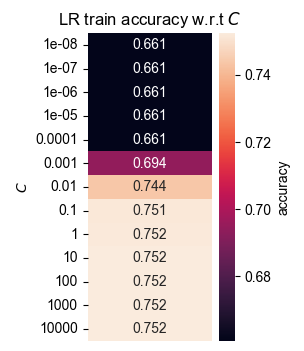

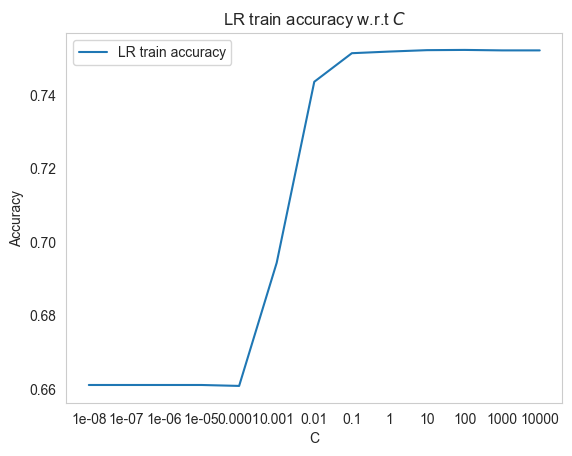

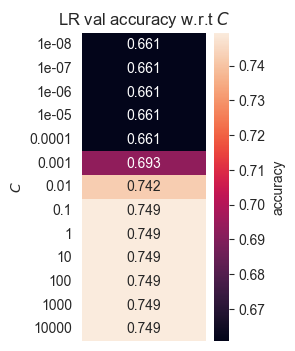

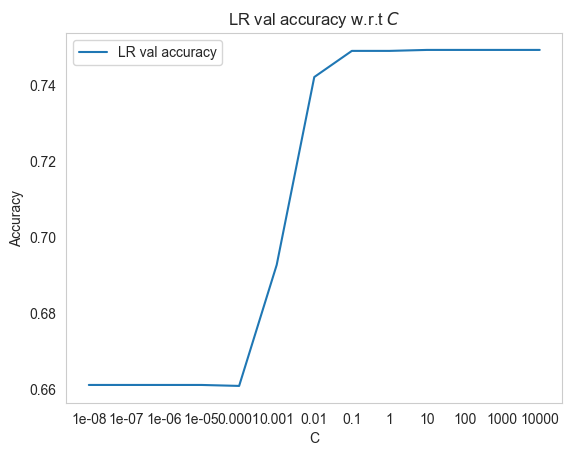

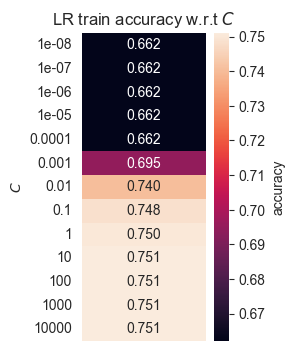

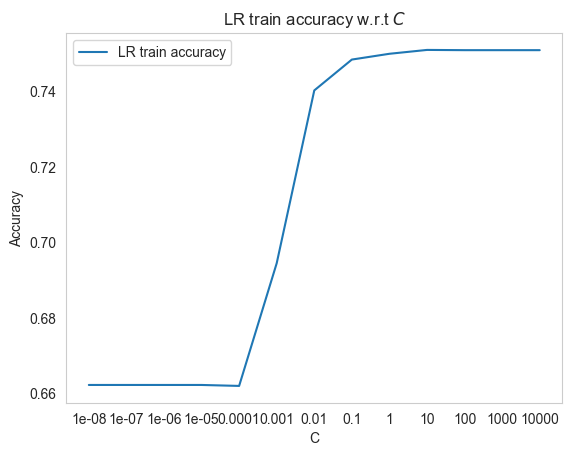

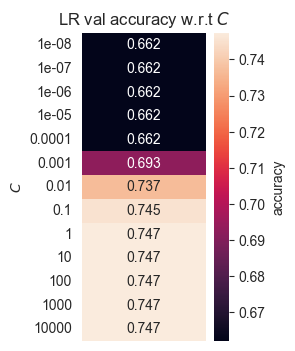

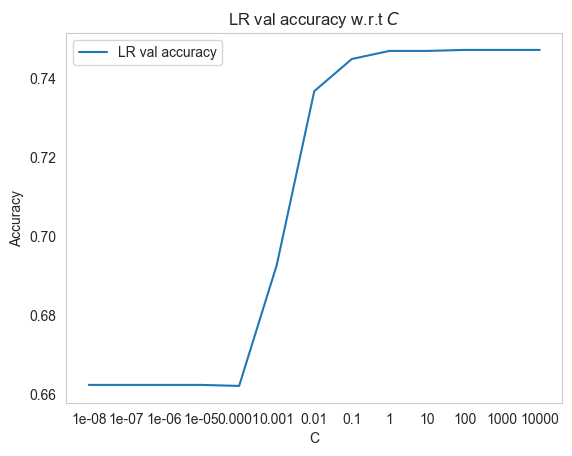

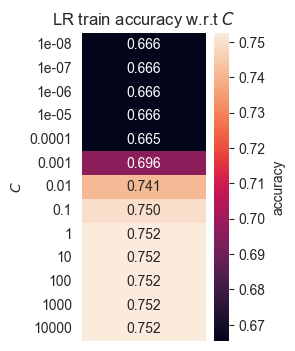

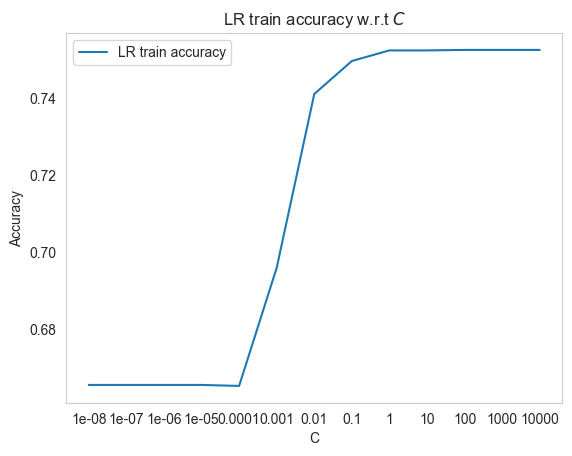

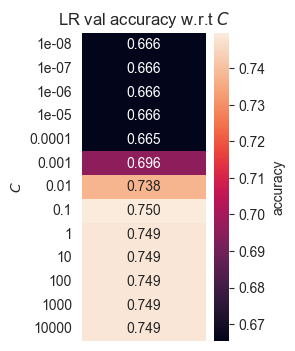

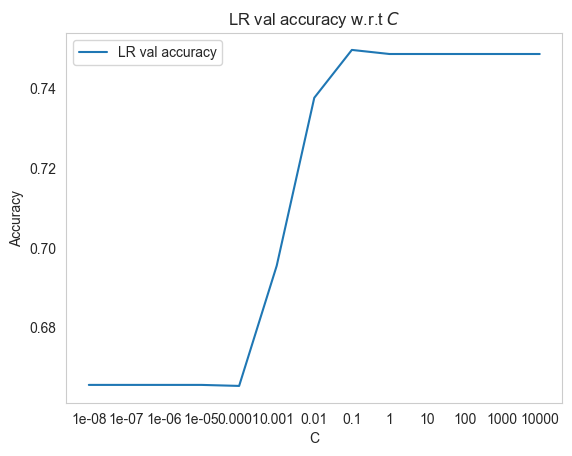

Test Accuracy Average Over 3 Trials for Logistic Regression =  0.7540816326530613
Partition:  0.5


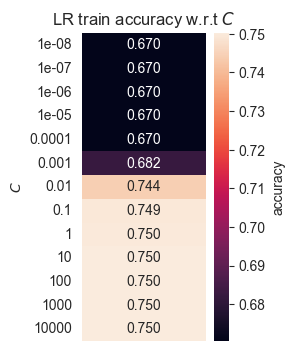

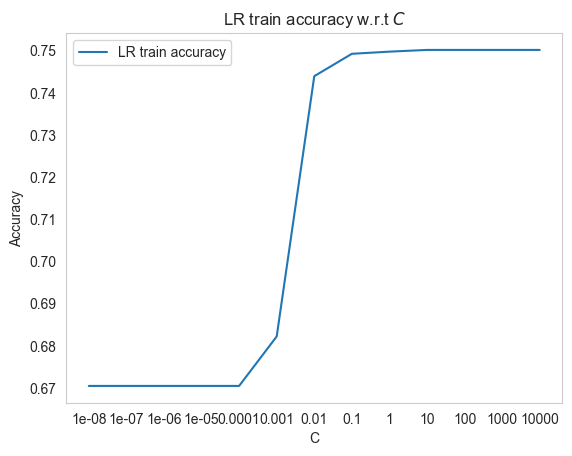

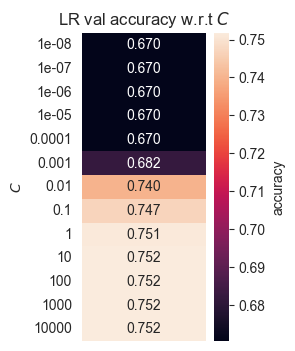

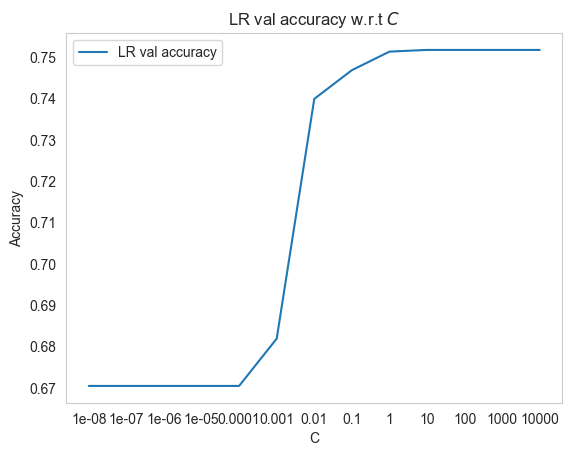

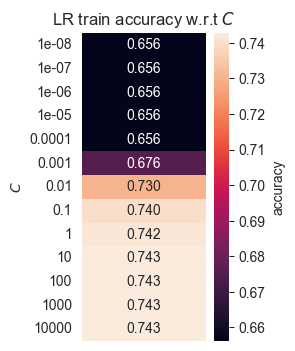

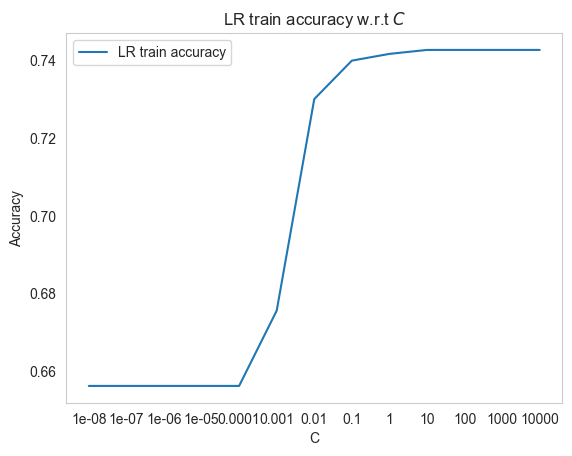

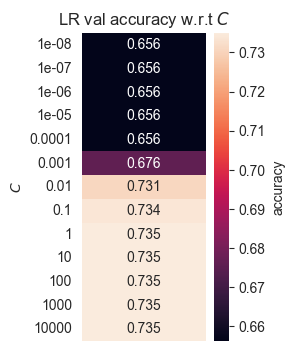

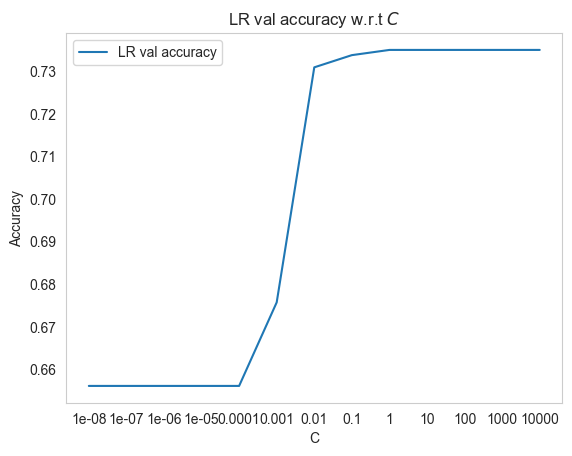

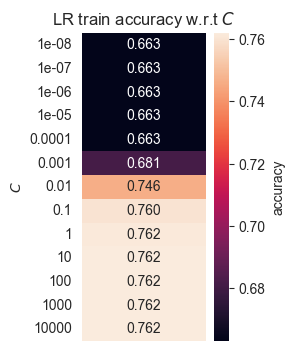

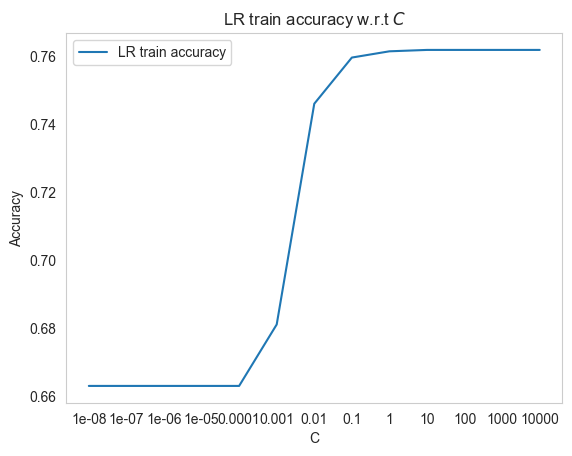

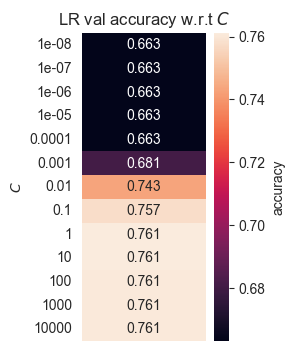

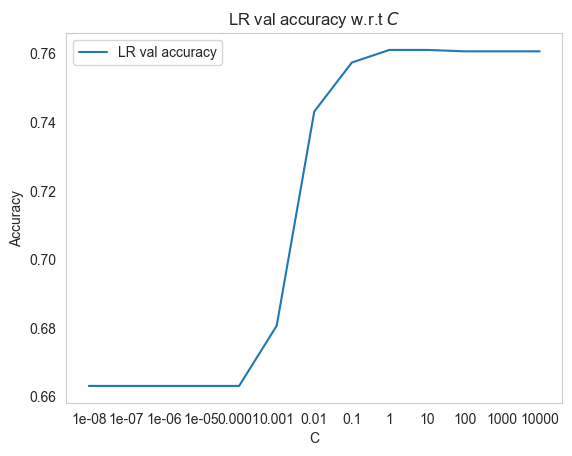

Test Accuracy Average Over 3 Trials for Logistic Regression =  0.7511909622975365
Partition:  0.2


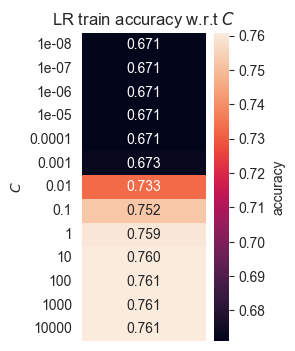

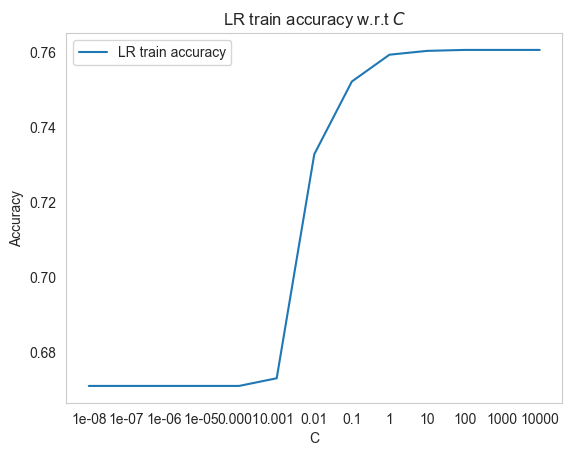

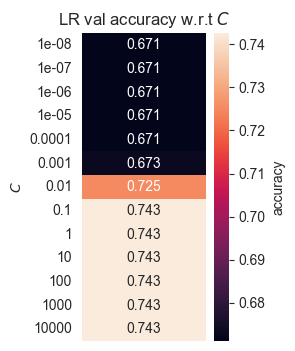

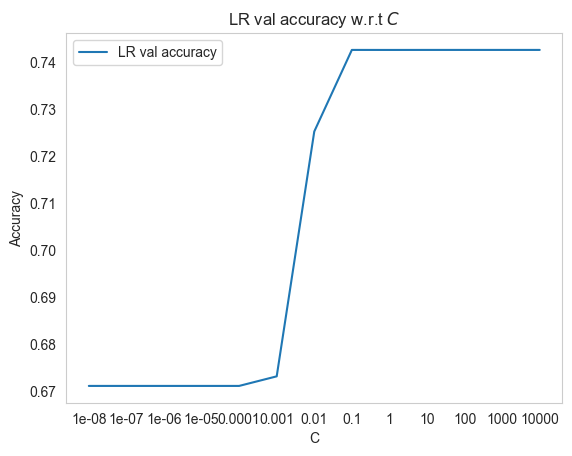

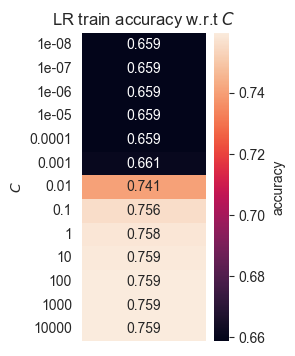

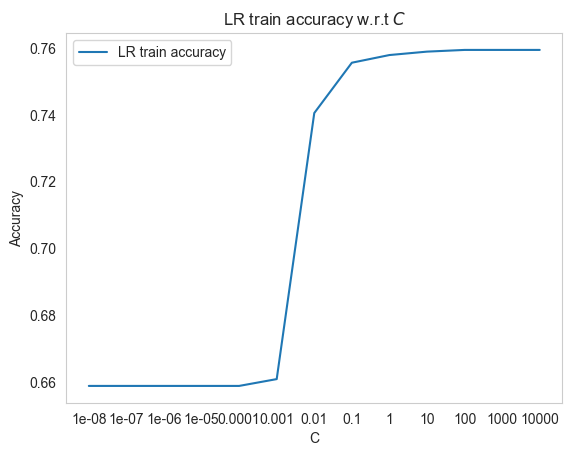

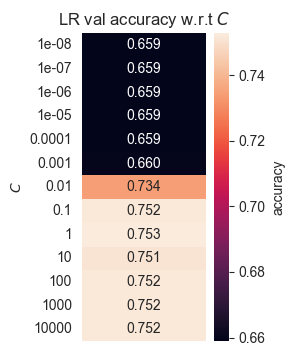

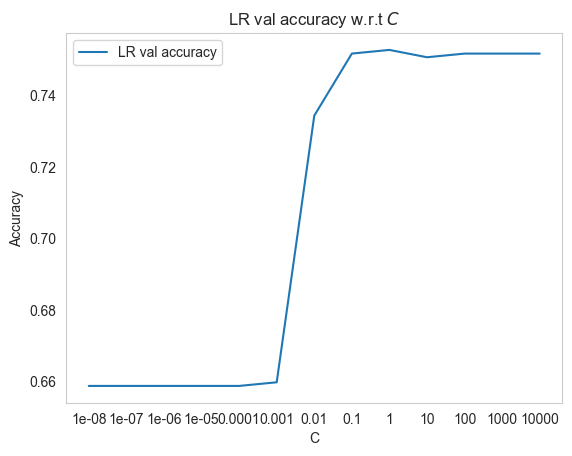

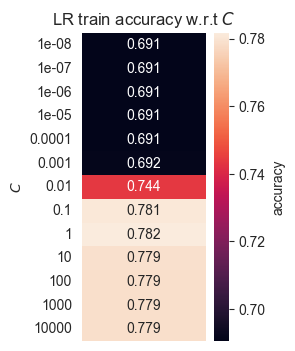

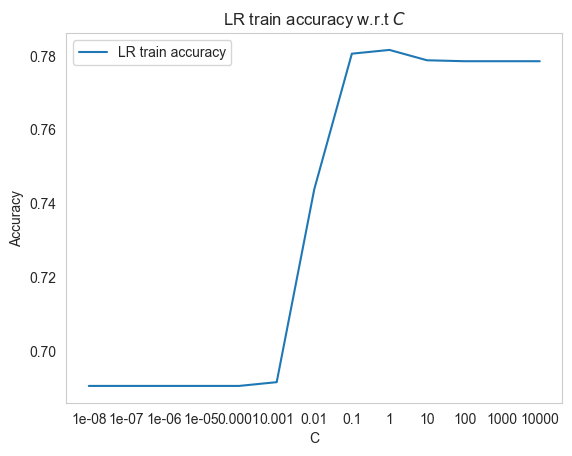

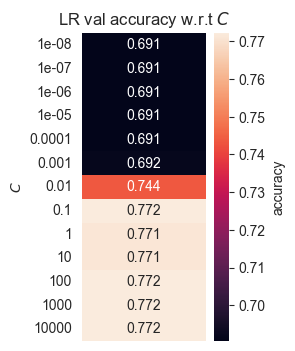

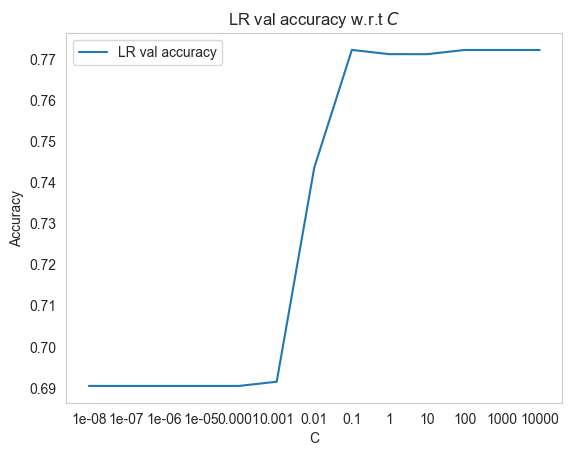

Test Accuracy Average Over 3 Trials for Logistic Regression =  0.741005358509824


In [13]:
partition_val = [0.8, 0.5, 0.2]
for i, partition in enumerate(partition_val):
    print("Partition: ", partition)
    logReg_test_acc = []

    for trial in range(3):
        np.random.shuffle(data)
        X_train = data[:int(partition*len(data)), :-1]
        Y_train = data[:int(partition*len(data)), -1]
        X_test = data[int(partition*len(data)):, :-1]
        Y_test = data[int(partition*len(data)):, -1]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        test_acc, best_train, c = logReg_classifier()
        logReg_test_acc.append(test_acc)
        
    avg_test_acc = sum(logReg_test_acc)/3
    avg_test_acc_result[i, 0] = avg_test_acc
    best_train_result[i, 0] = best_train
    best_param_result[i, 0] = c
    
    print("Test Accuracy Average Over 3 Trials for Logistic Regression = ", avg_test_acc)

### 3.2 Using SVM Classifier

In [14]:
def svm_classifier():
    classifier = svm.SVC(kernel = 'linear')
    C_list     = [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 1, 10] 
    parameters = {'C': C_list}
    clf = GridSearchCV(classifier, parameters, return_train_score = True, cv=5)
    clf.fit(X_train_scaled, Y_train)

    train_acc = clf.cv_results_['mean_train_score']
    draw_heatmap(train_acc.reshape(-1,1), 'SVM train accuracy', C_list, 'C')
    draw_curve(train_acc.reshape(-1,1), 'SVM train accuracy', C_list, 'C')

    val_acc = clf.cv_results_['mean_test_score']
    draw_heatmap(val_acc.reshape(-1,1), 'SVM val accuracy', C_list, 'C')
    draw_curve(val_acc.reshape(-1,1), 'SVM val accuracy', C_list, 'C')

    opt_classifier = svm.SVC(kernel = 'linear', C = clf.best_params_['C'] )
    
    for i,j in enumerate(C_list):
        if j == clf.best_params_['C']:
            best_train_acc = train_acc[i]
            
    opt_classifier.fit(X_train_scaled, Y_train)
    test_acc = opt_classifier.score(X_test_scaled, Y_test)
    return test_acc, best_train_acc, clf.best_params_['C']

Partition:  0.8


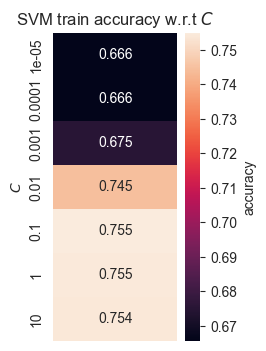

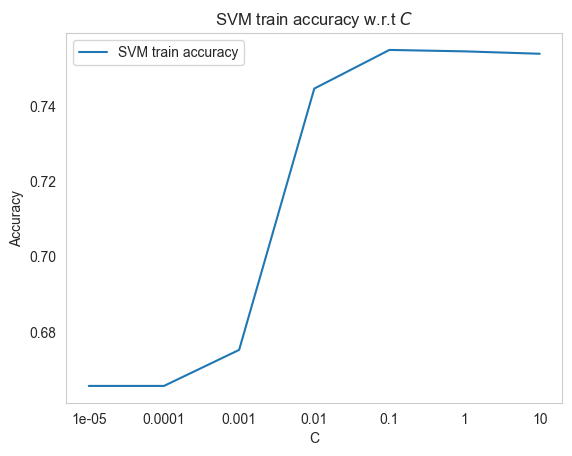

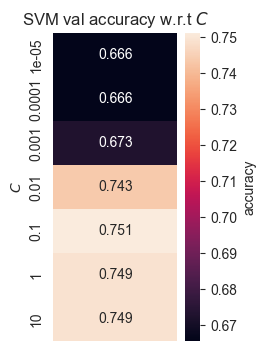

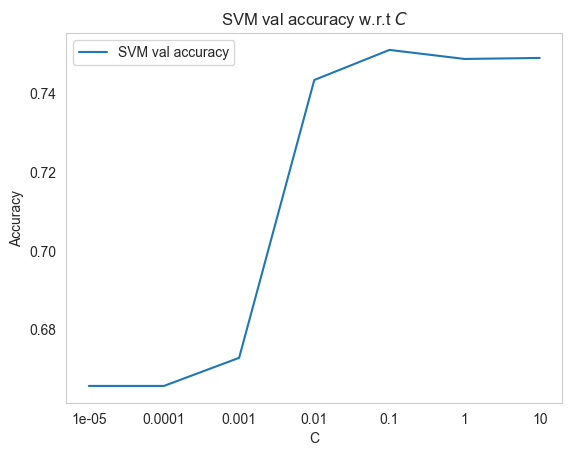

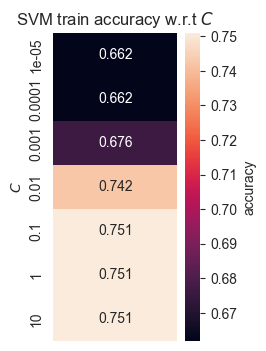

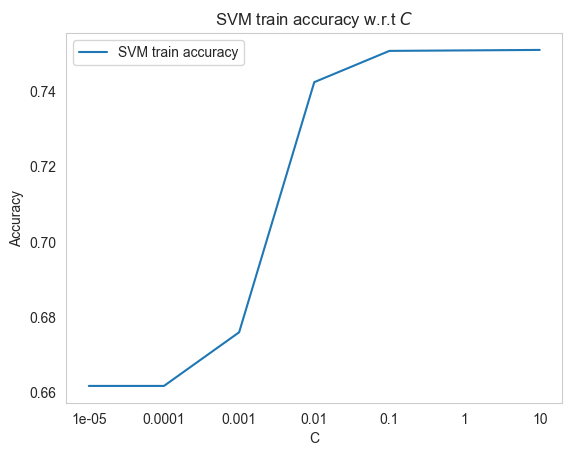

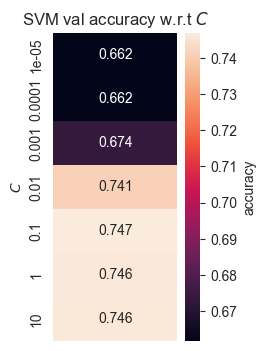

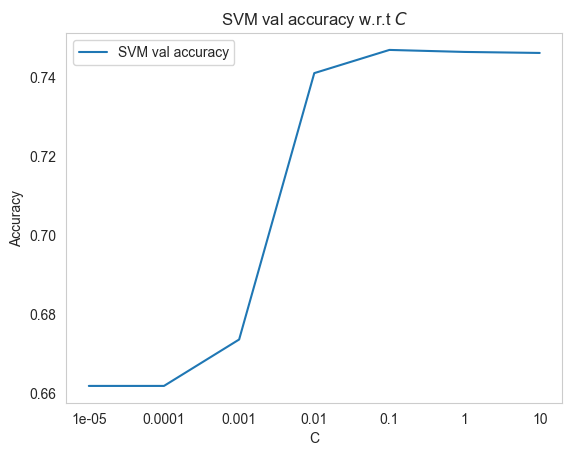

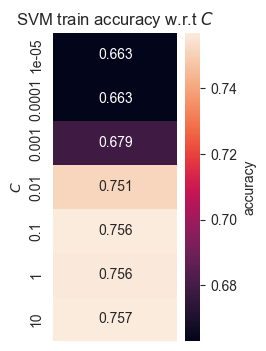

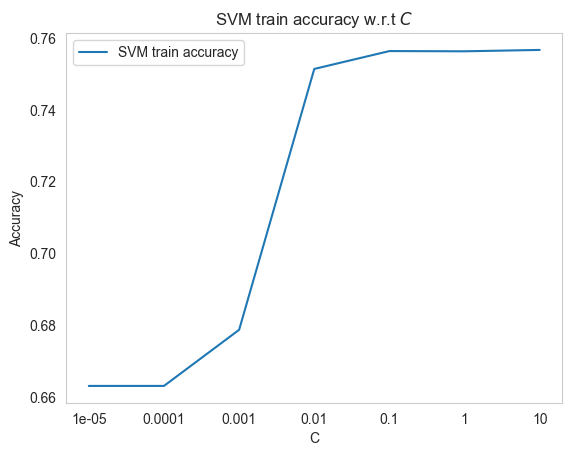

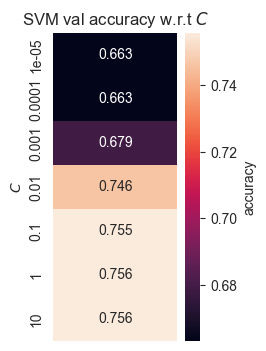

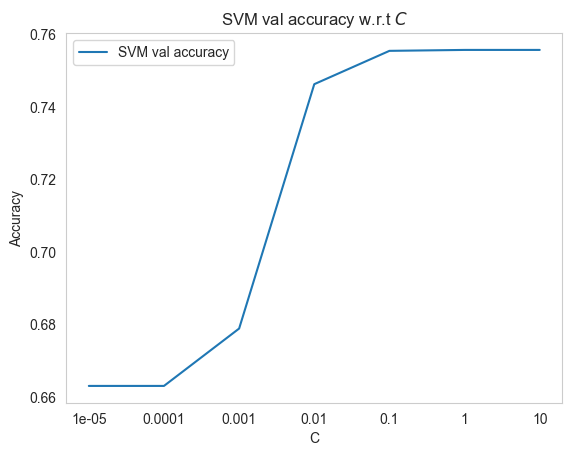

Test Accuracy Average Over 3 Trials for SVM =  0.7557823129251701
Partition:  0.5


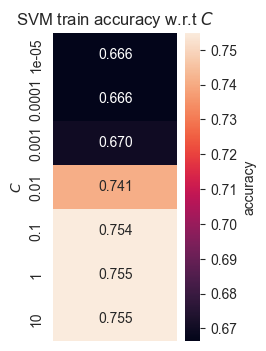

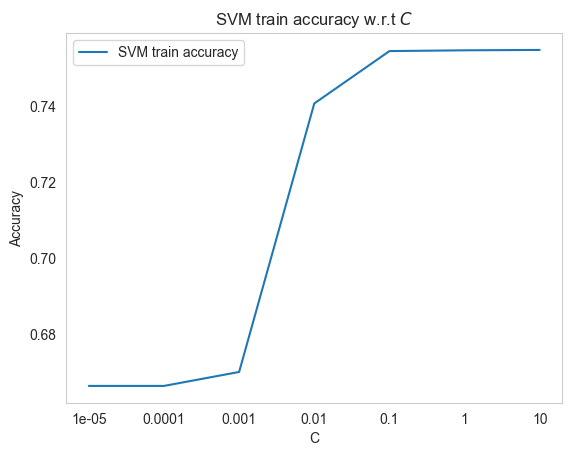

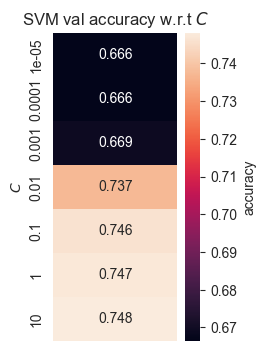

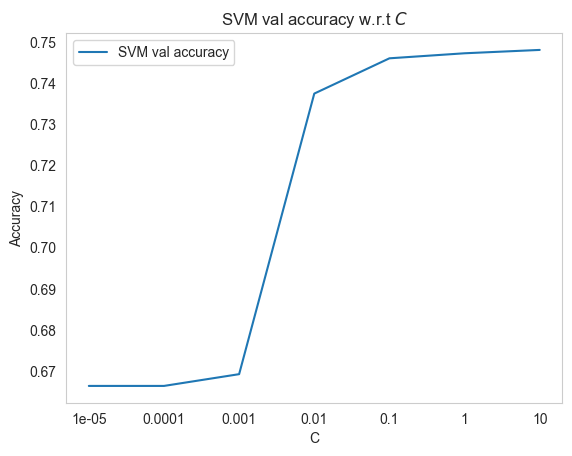

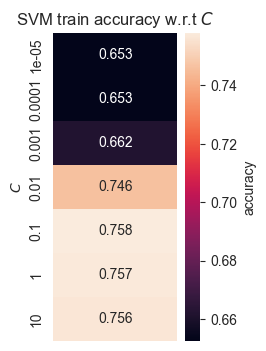

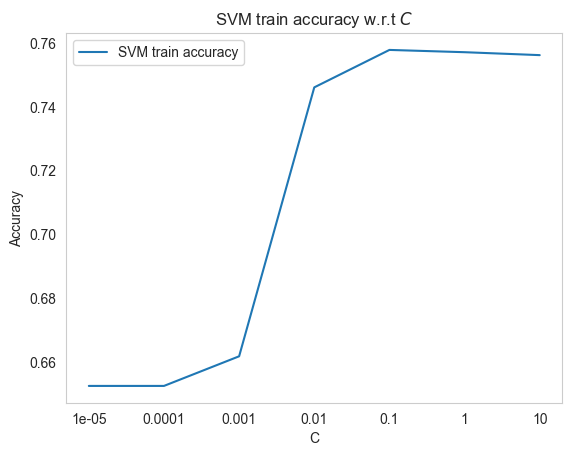

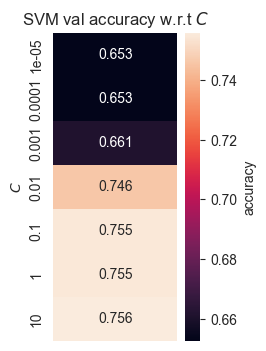

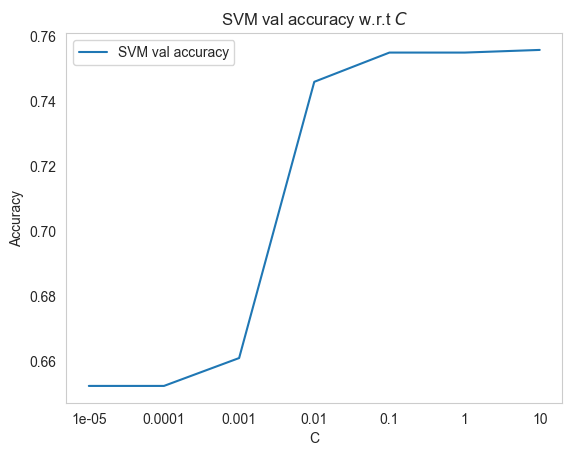

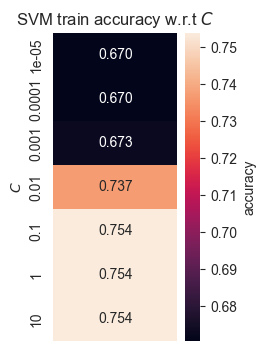

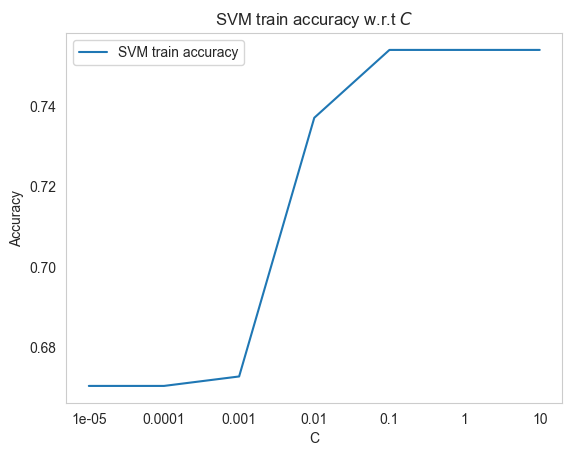

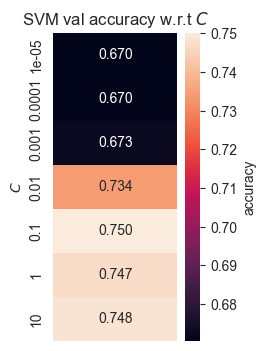

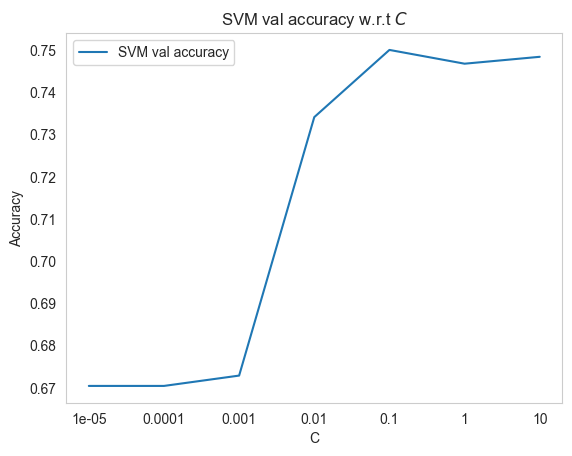

Test Accuracy Average Over 3 Trials for SVM =  0.7502381924595073
Partition:  0.2


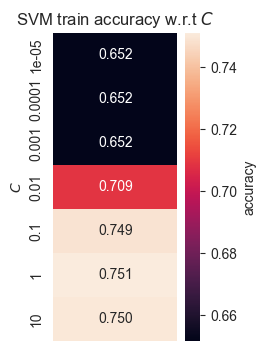

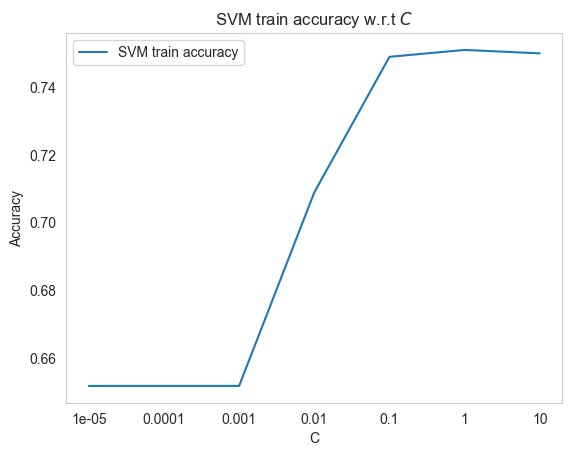

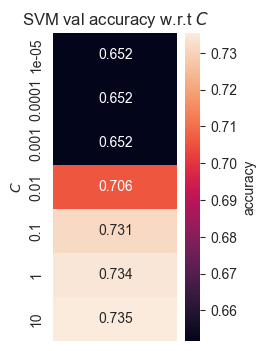

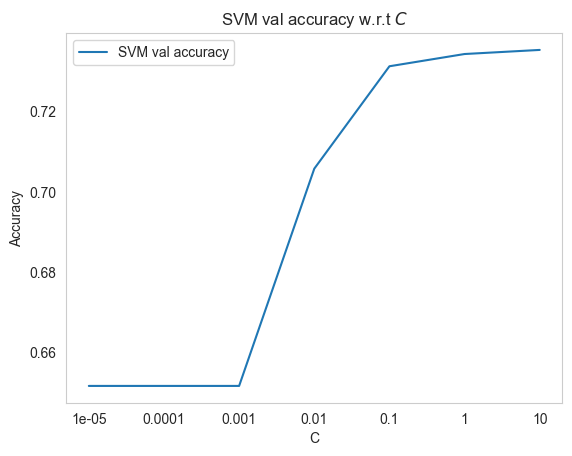

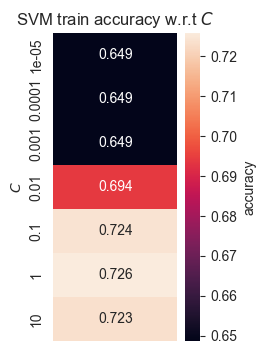

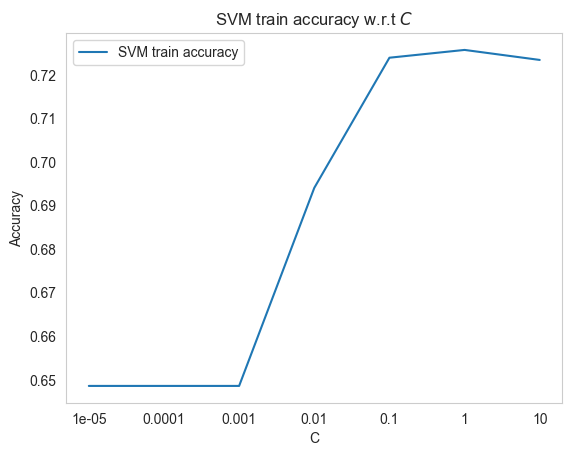

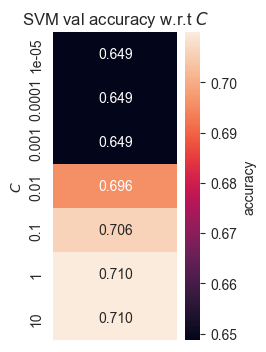

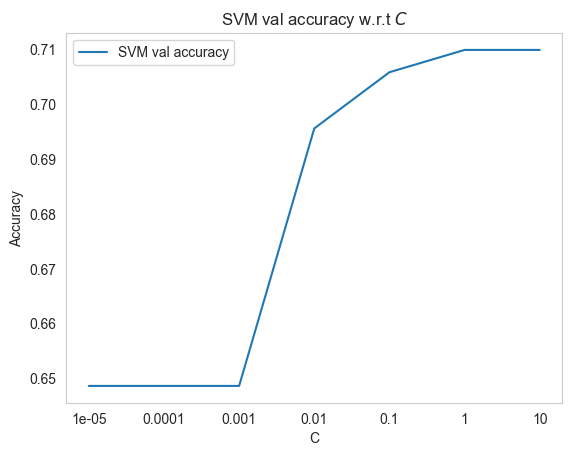

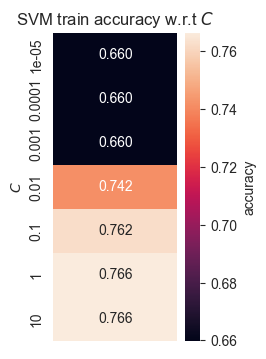

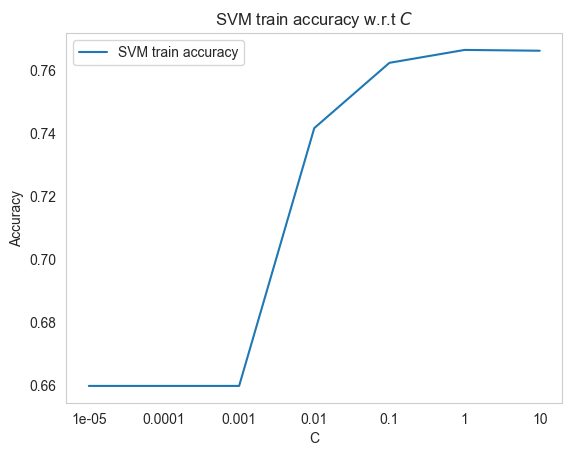

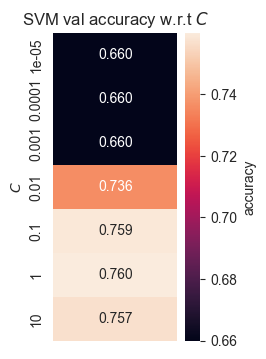

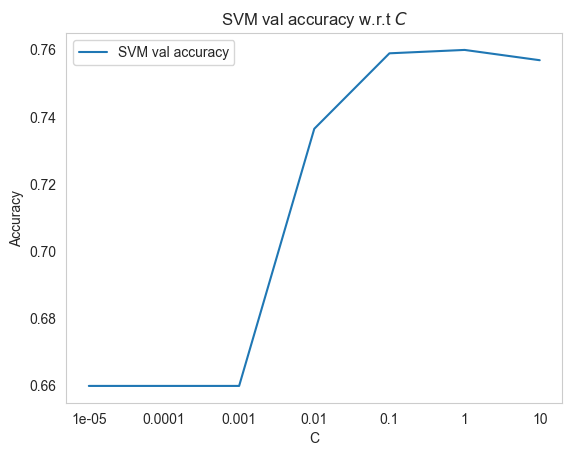

Test Accuracy Average Over 3 Trials for SVM =  0.750956876754274


In [15]:
partition_val = [0.8, 0.5, 0.2]
for i, partition in enumerate(partition_val):
    print("Partition: ", partition)
    svm_test_acc = []

    for trial in range(3):
        np.random.shuffle(data)
        X_train = data[:int(partition*len(data)), :-1]
        Y_train = data[:int(partition*len(data)), -1]
        X_test = data[int(partition*len(data)):, :-1]
        Y_test = data[int(partition*len(data)):, -1]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        test_acc, best_train, c = svm_classifier()
        svm_test_acc.append(test_acc)
        
    avg_test_acc = sum(svm_test_acc)/3
    avg_test_acc_result[i, 1] = avg_test_acc
    best_train_result[i, 1] = best_train
    best_param_result[i, 1] = c
    
    print("Test Accuracy Average Over 3 Trials for SVM = ", avg_test_acc)

### 3.3 Using KNN Classifier

In [16]:
def knn_classifier():
    k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    parameters = {'n_neighbors':k_list}
    classifier_grid = GridSearchCV(KNeighborsClassifier(), parameters, cv=5, return_train_score=True)
    classifier_grid.fit(X_train_scaled, Y_train)
    
    draw_heatmap(classifier_grid.cv_results_['mean_train_score'].reshape(10,1), 'KNN train accuracy', k_list, 'K')
    draw_curve(classifier_grid.cv_results_['mean_train_score'].reshape(10,1), 'KNN train accuracy', k_list, 'K')
    
    draw_heatmap(classifier_grid.cv_results_['mean_test_score'].reshape(10,1), 'KNN val accuracy', k_list, 'K')
    draw_curve(classifier_grid.cv_results_['mean_test_score'].reshape(10,1), 'KNN val accuracy', k_list, 'K')
    
    classifier_test2 = KNeighborsClassifier(n_neighbors=classifier_grid.best_params_['n_neighbors'])
    classifier_test2.fit(X_train_scaled,Y_train)
    test_acc = classifier_test2.score(X_test_scaled,Y_test)
    
    train_acc = classifier_grid.cv_results_['mean_train_score']
    for i,j in enumerate(k_list):
        if j == classifier_grid.best_params_['n_neighbors']:
            best_train_acc = train_acc[i]
    
    return test_acc, best_train_acc, classifier_grid.best_params_['n_neighbors']

Partition:  0.8


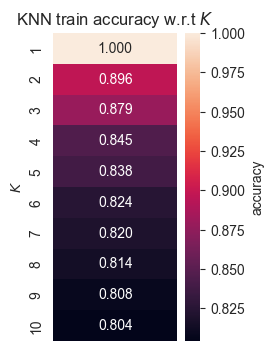

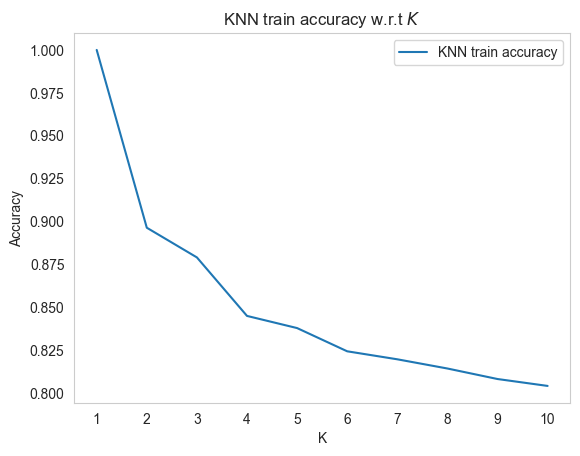

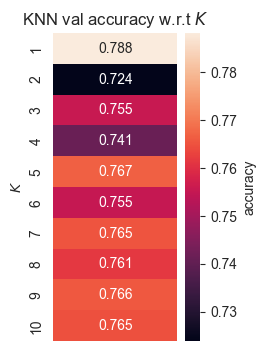

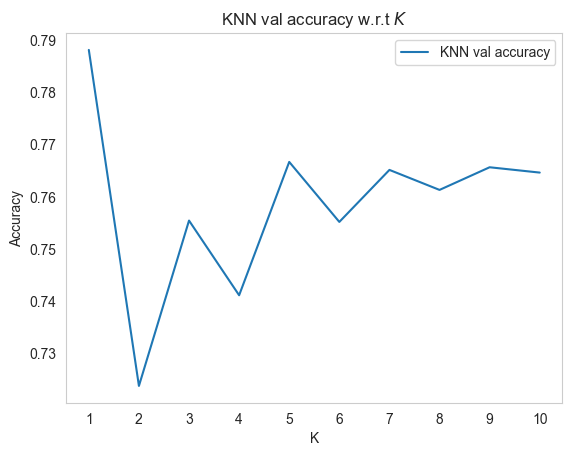

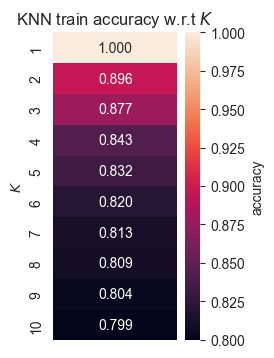

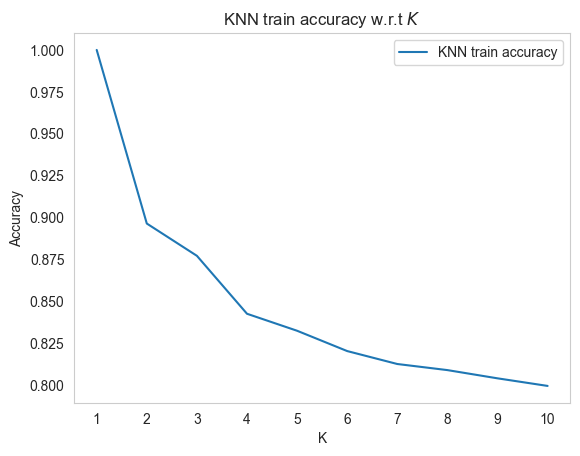

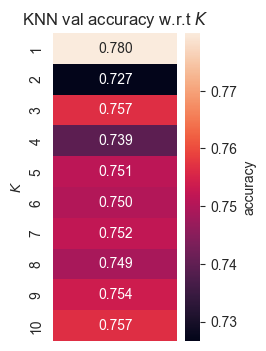

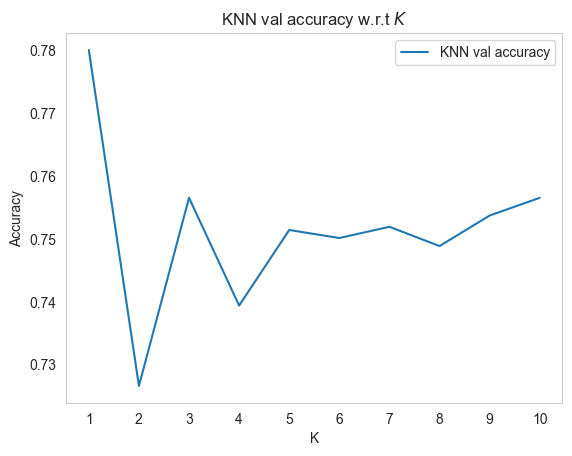

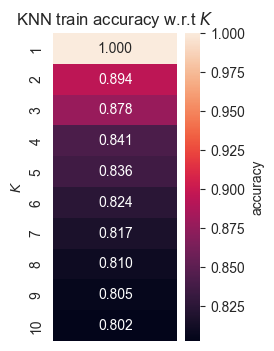

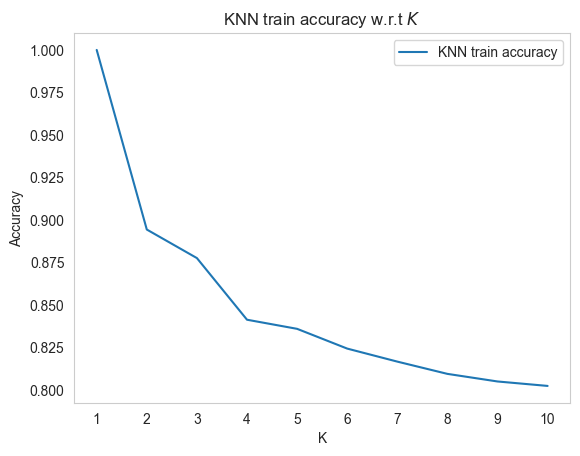

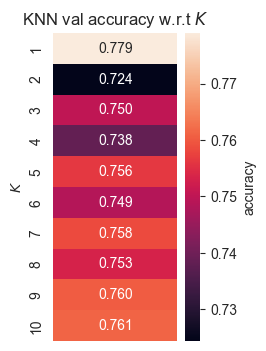

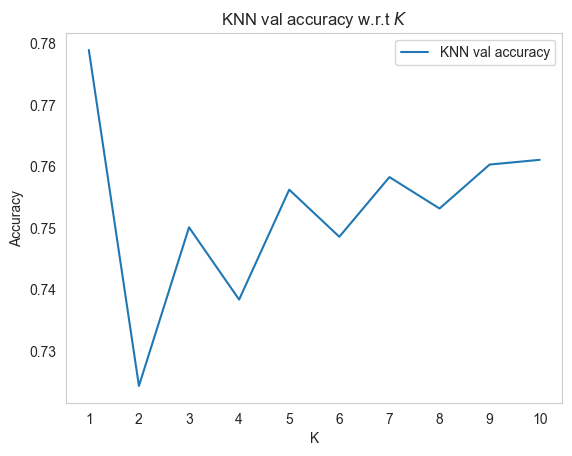

Test Accuracy Average Over 3 Trials for KNN =  0.8122448979591836
Partition:  0.5


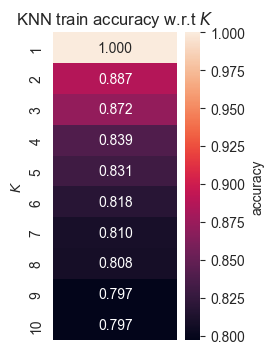

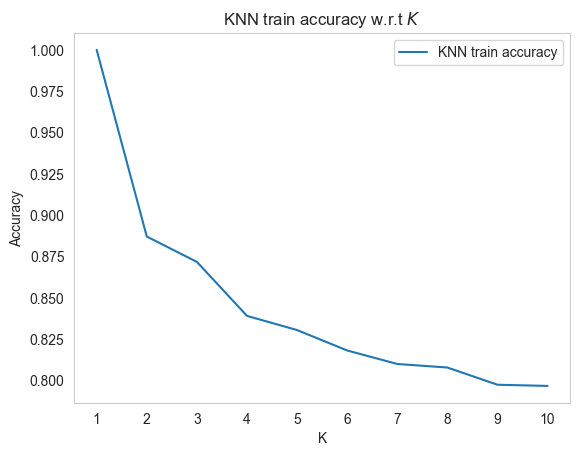

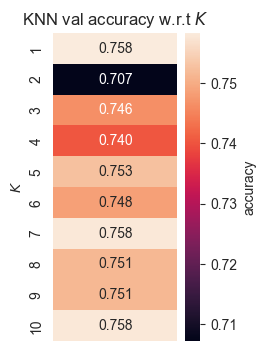

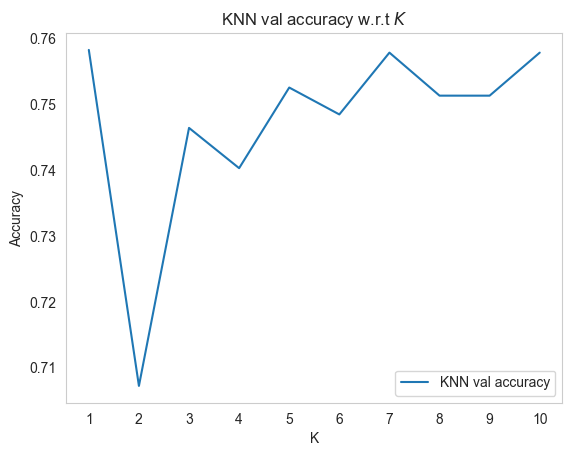

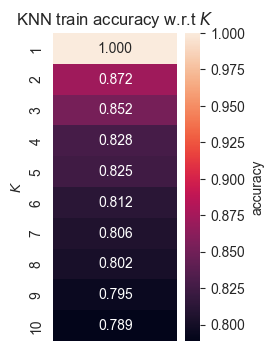

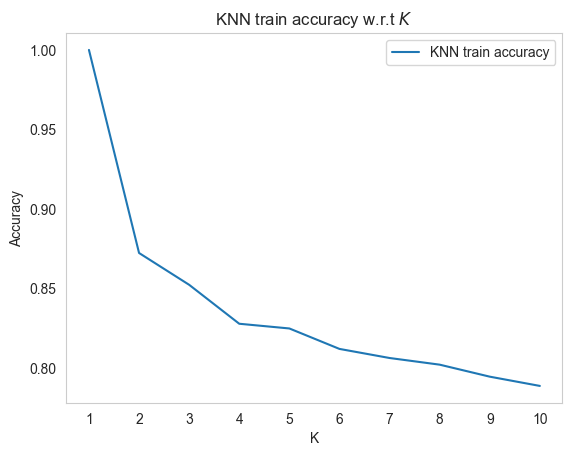

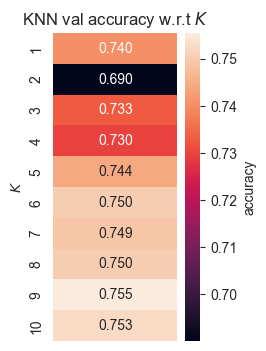

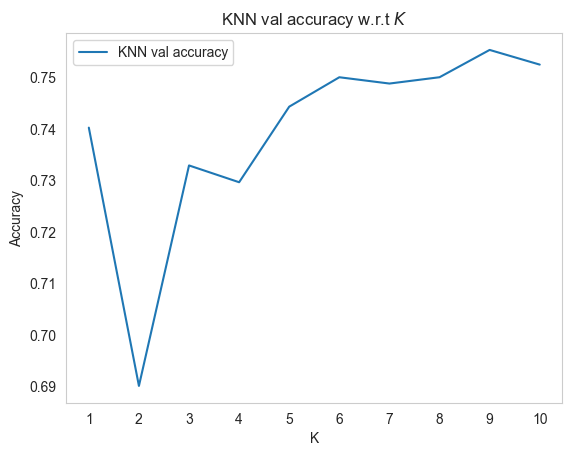

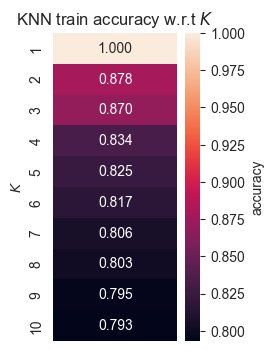

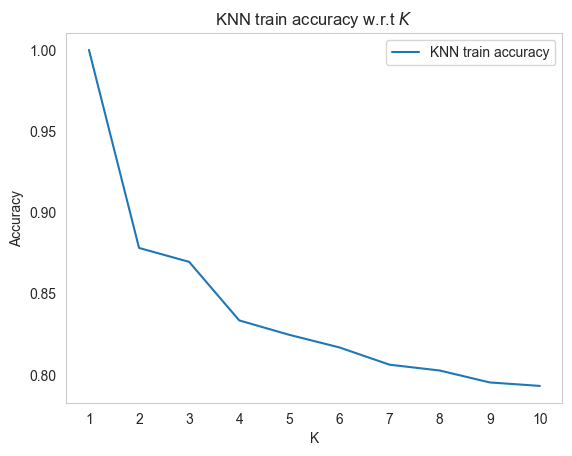

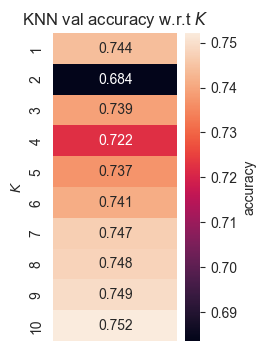

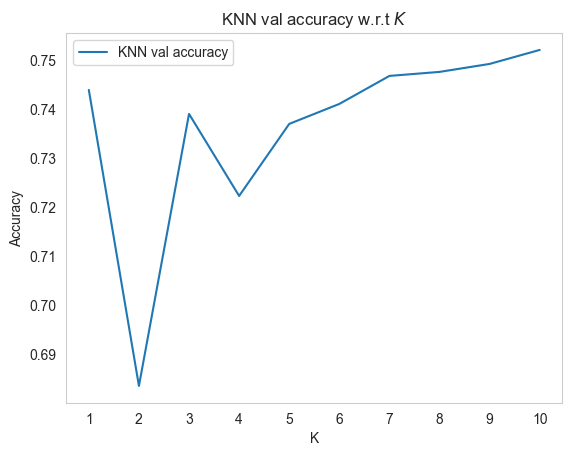

Test Accuracy Average Over 3 Trials for KNN =  0.7582686810943242
Partition:  0.2


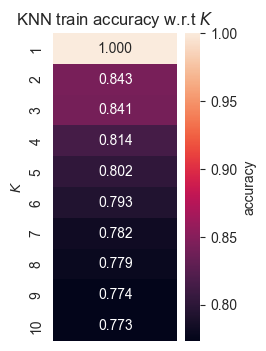

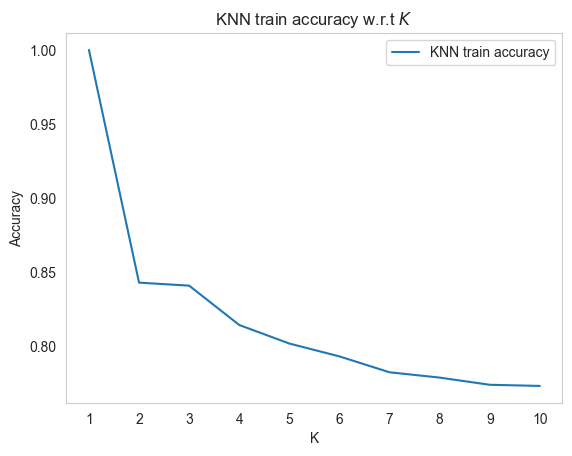

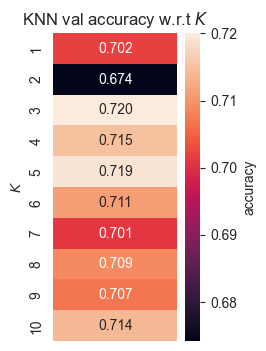

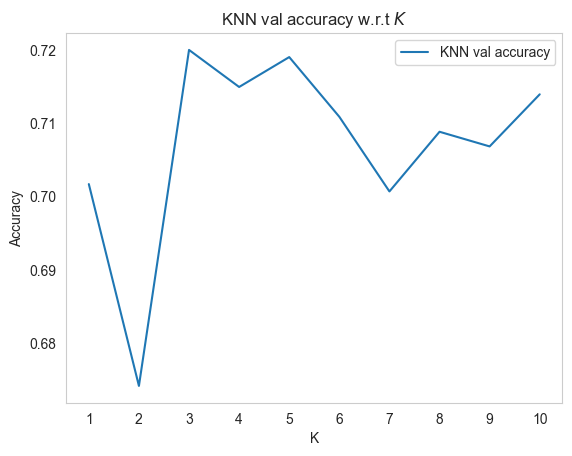

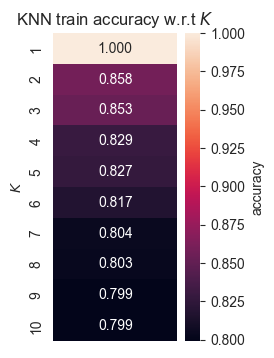

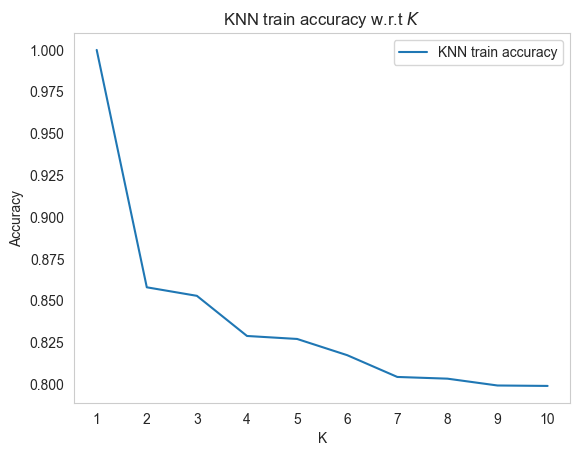

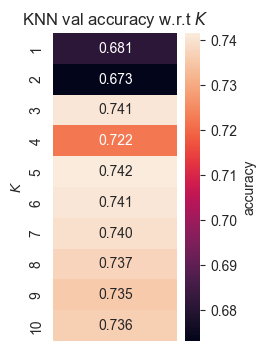

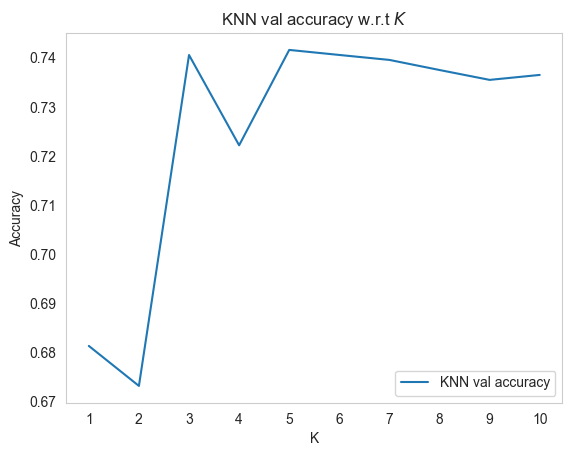

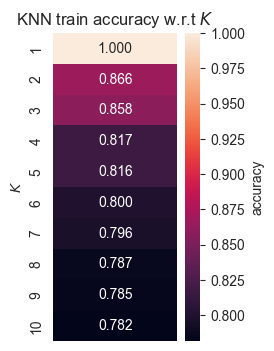

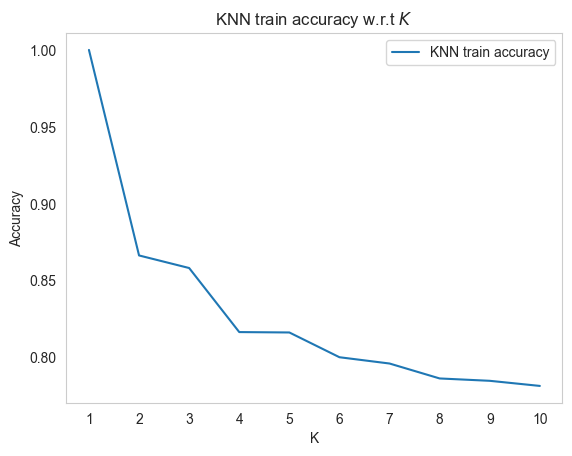

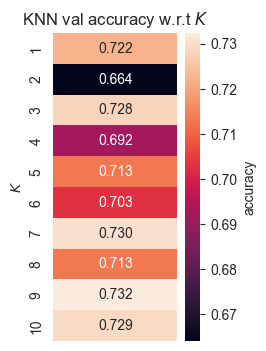

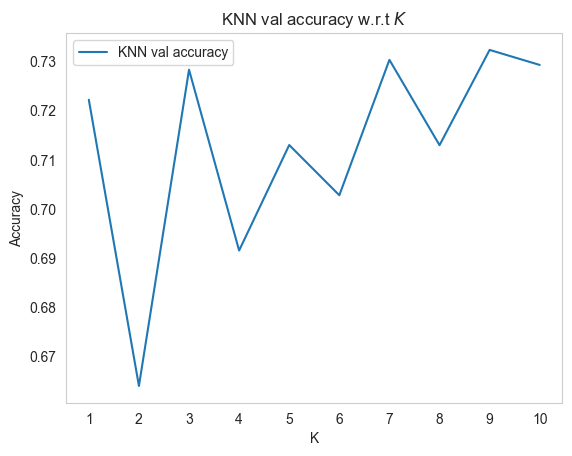

Test Accuracy Average Over 3 Trials for KNN =  0.7376031300501827


In [17]:
partition_val = [0.8, 0.5, 0.2]
for i, partition in enumerate(partition_val):
    print("Partition: ", partition)
    knn_test_acc = []

    for trial in range(3):
        np.random.shuffle(data)
        X_train = data[:int(partition*len(data)), :-1]
        Y_train = data[:int(partition*len(data)), -1]
        X_test = data[int(partition*len(data)):, :-1]
        Y_test = data[int(partition*len(data)):, -1]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        test_acc, best_train, c = knn_classifier()
        knn_test_acc.append(test_acc)
        
    avg_test_acc = sum(knn_test_acc)/3
    avg_test_acc_result[i, 2] = avg_test_acc
    best_train_result[i, 2] = best_train
    best_param_result[i, 2] = c
    
    print("Test Accuracy Average Over 3 Trials for KNN = ", avg_test_acc)

### 4. Results

In [18]:
print(avg_test_acc_result)

[[0.75408163 0.75578231 0.8122449 ]
 [0.75119096 0.75023819 0.75826868]
 [0.74100536 0.75095688 0.73760313]]


In [19]:
print(best_train_result)

[[0.74961717 0.75669967 1.        ]
 [0.76153494 0.75387875 0.79318103]
 [0.78064515 0.76634315 0.78498742]]


In [20]:
print(best_param_result)

[[ 0.1 10.   1. ]
 [ 1.   0.1 10. ]
 [ 0.1  1.   9. ]]
